In [71]:
import numpy as np
from numpy.polynomial import polynomial as poly
from matplotlib import pyplot as plt

In [72]:
np.random.seed(42)

# 1.
Generate a hypothetical time series for $t = 1, · · · , 1000$ using the following specifications. For each specification, plot the hypothetical series; compute the theoretical mean, variance, and first-order autocorrelation; and compare with their sample counterparts.

(a) $x_t = 0.3 + 0.85x_{t−1} + \epsilon_t$, where $\epsilon_t ∼ N(0, 1)$

In [45]:
# AR(1) process
e = np.random.normal(0, 1, 1000)
x_t = np.zeros(1000)
for t in range(1, 1000):
    x_t[t] = 0.3 + 0.85 * x_t[t-1] + e[t]

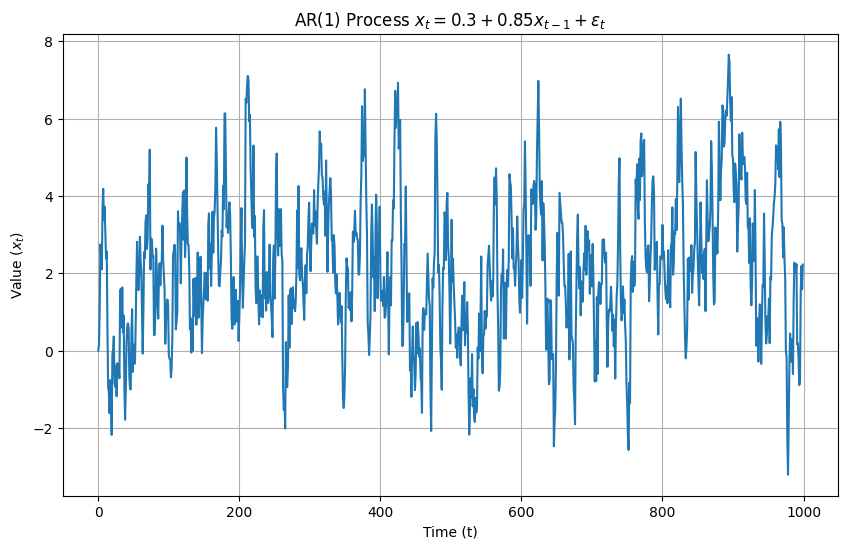

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(x_t)
plt.title(r"AR(1) Process $x_t = 0.3 + 0.85x_{t-1} + \epsilon_t$")
plt.xlabel("Time (t)")
plt.ylabel("Value ($x_t$)")
plt.grid(True)
plt.show()

In [47]:
sample_mean = np.mean(x_t)
sample_var = np.var(x_t)
sample_autocor = np.corrcoef(x_t[:-1], x_t[1:])[0, 1]

theoretical_mean = 0.3 / (1 - 0.85)
theoretical_var = 1 / (1 - 0.85**2)
theoretical_autocor = 0.85

print(f"Sample Mean: {sample_mean:.4f}, Theoretical Mean: {theoretical_mean:.4f}")
print(f"Sample Variance: {sample_var:.4f}, Theoretical Variance: {theoretical_var:.4f}")
print(f"Sample Autocorrelation: {sample_autocor:.4f}, Theoretical Autocorrelation: {theoretical_autocor:.4f}")


Sample Mean: 2.1110, Theoretical Mean: 2.0000
Sample Variance: 3.4168, Theoretical Variance: 3.6036
Sample Autocorrelation: 0.8482, Theoretical Autocorrelation: 0.8500


(b) $y_t = 0.8 + ϵ_t + 1.2ϵ_{t−1}$, where $ϵ_t ∼ N(0, 0.1)$

In [48]:
# MA(1) process
e = np.random.normal(0, 0.1**0.5, 1000)
x_t = np.zeros(1000)
for t in range(1, 1000):
    x_t[t] = 0.8 + e[t] + 1.2 * e[t-1]

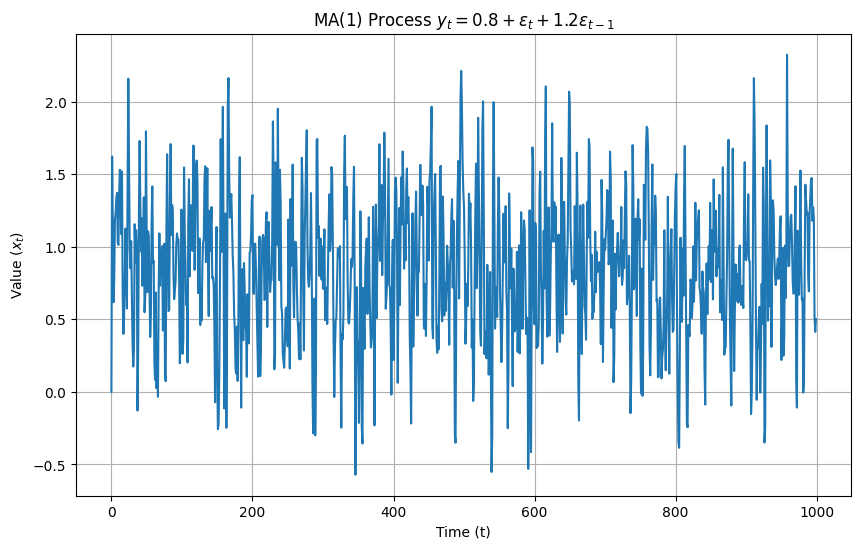

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(x_t)
plt.title(r"MA(1) Process $y_t = 0.8 + \epsilon_t + 1.2\epsilon_{t−1}$")
plt.xlabel("Time (t)")
plt.ylabel("Value ($x_t$)")
plt.grid(True)
plt.show()

In [50]:
sample_mean = np.mean(x_t)
sample_var = np.var(x_t)
sample_autocor = np.corrcoef(x_t[:-1], x_t[1:])[0, 1]

theoretical_mean = 0.8
theoretical_var = 0.1 * (1 + 1.2**2)
theoretical_autocor = 1.2 / (1 + 1.2**2)

print(f"Sample Mean: {sample_mean:.4f}, Theoretical Mean: {theoretical_mean:.4f}")
print(f"Sample Variance: {sample_var:.4f}, Theoretical Variance: {theoretical_var:.4f}")
print(f"Sample Autocorrelation: {sample_autocor:.4f}, Theoretical Autocorrelation: {theoretical_autocor:.4f}")


Sample Mean: 0.8483, Theoretical Mean: 0.8000
Sample Variance: 0.2396, Theoretical Variance: 0.2440
Sample Autocorrelation: 0.4741, Theoretical Autocorrelation: 0.4918


## 2.
Are the following AR processes stationary? Find the roots of the characteristic equation.

In order to determine wether the AR process is staitonary, we use the characteristic equation and test if all roots lie inside the unit circle.

In [93]:
def calculate_roots(coefficients):
    polyroots = poly.polyroots(coefficients)
    print(f"The roots are: {polyroots}")
    return polyroots

def check_stationarity(roots):
    stationary = np.all(np.abs(roots) < 1)
    if stationary:
        print("\nConclusion: The process is STATIONARY because all roots are inside the unit circle.")
    else:
        print("\nConclusion: The process is NOT STATIONARY because at least one root is on or outside the unit circle.")

(a) $y_t = 0.7y_{t−1} + 0.2y_{t−2} + \epsilon_t$

In [94]:
roots = calculate_roots([-0.2, -0.7, 1])

check_stationarity(roots)

The roots are: [-0.21789083  0.91789083]

Conclusion: The process is STATIONARY because all roots are inside the unit circle.


(b) $y_t = 0.7y_{t−1} + 0.301y_{t−2} + \epsilon_t$


In [95]:
roots = calculate_roots([-0.301, -0.7, 1])

check_stationarity(roots)

The roots are: [-0.30076878  1.00076878]

Conclusion: The process is NOT STATIONARY because at least one root is on or outside the unit circle.


(c) $y_t = 0.6y_{t−1} - 0.4y_{t−2} + 0.5y_{t−3} + 0.4y_{t−4} + \epsilon_t$

In [97]:
roots = calculate_roots([-0.4, -0.5, 0.4, -0.6, 1])

check_stationarity(roots)

The roots are: [-0.44894023+0.j          0.00579008-0.92674978j  0.00579008+0.92674978j
  1.03736008+0.j        ]

Conclusion: The process is NOT STATIONARY because at least one root is on or outside the unit circle.


(d) $y_t = 1.1y_{t−1} - 0.47y_{t−2} + 0.44y_{t−3} - 0.32y_{t−4} + 0.29y_{t-5} - 0.38y_{t-6} + 0.17y_{t-7} + \epsilon_t$

In [99]:
roots = calculate_roots([-0.17, 0.38, -0.29, 0.32, -0.44, 0.47, -1.1, 1])

check_stationarity(roots)

The roots are: [-0.59749801-0.53913641j -0.59749801+0.53913641j  0.08027147-0.79043564j
  0.08027147+0.79043564j  0.68354684-0.27321663j  0.68354684+0.27321663j
  0.76735939+0.j        ]

Conclusion: The process is STATIONARY because all roots are inside the unit circle.
